#K FOLD CROSS VALIDATION

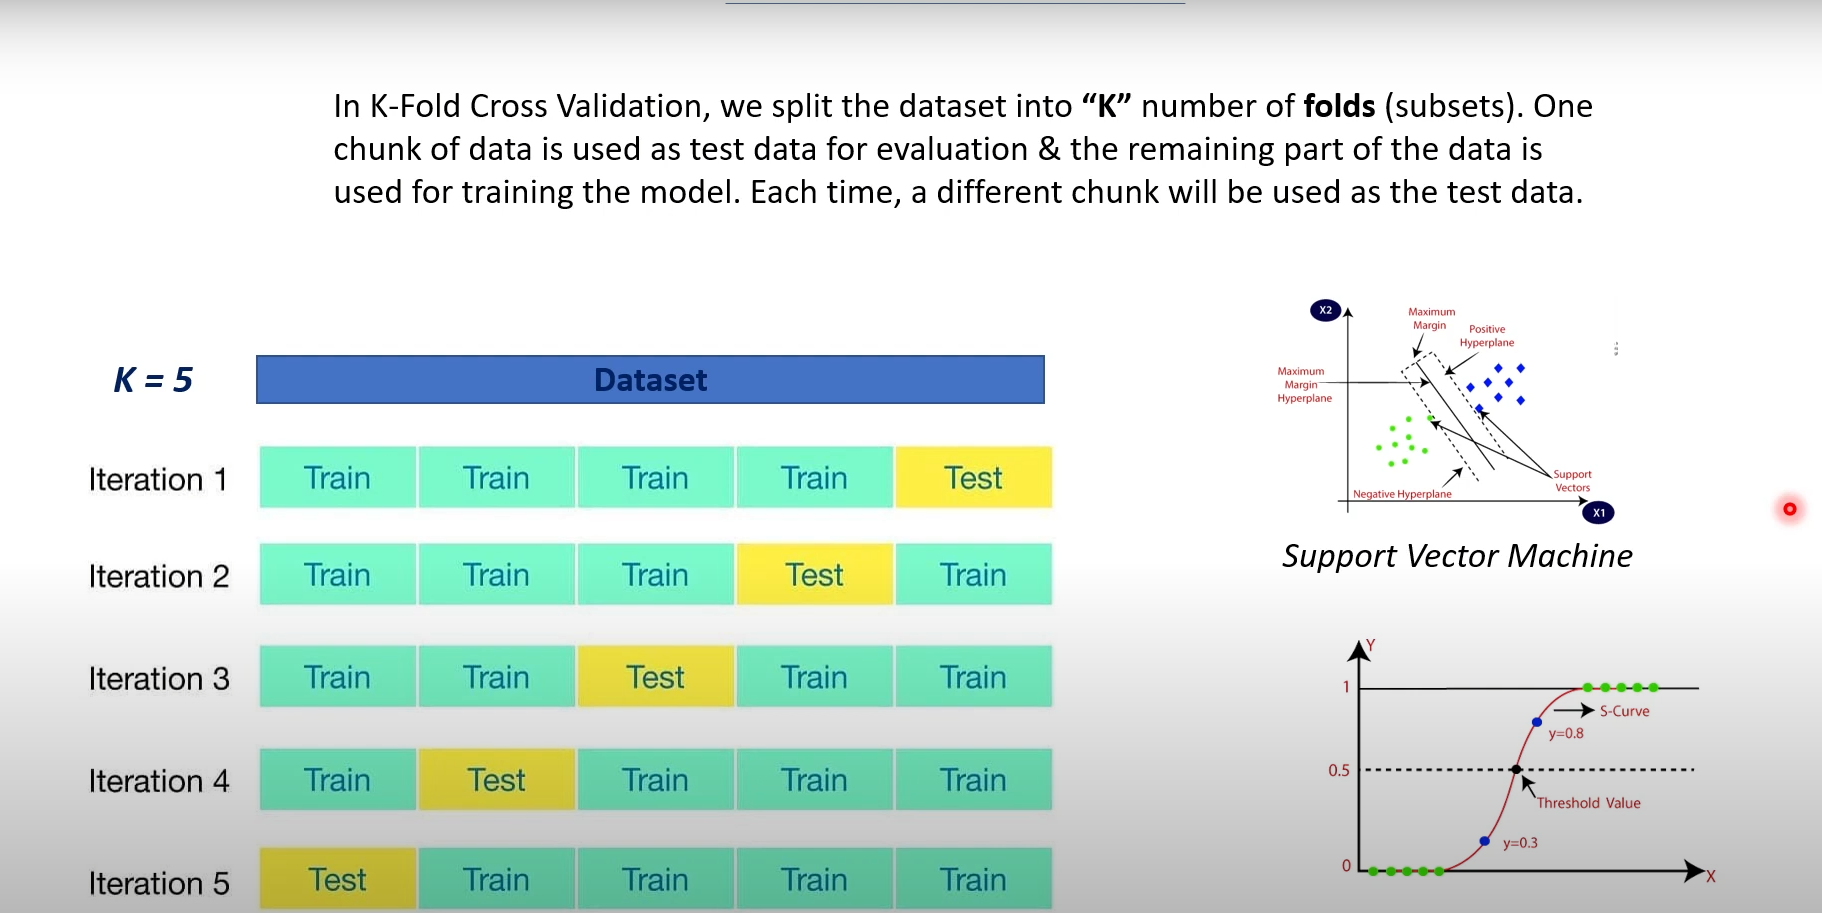

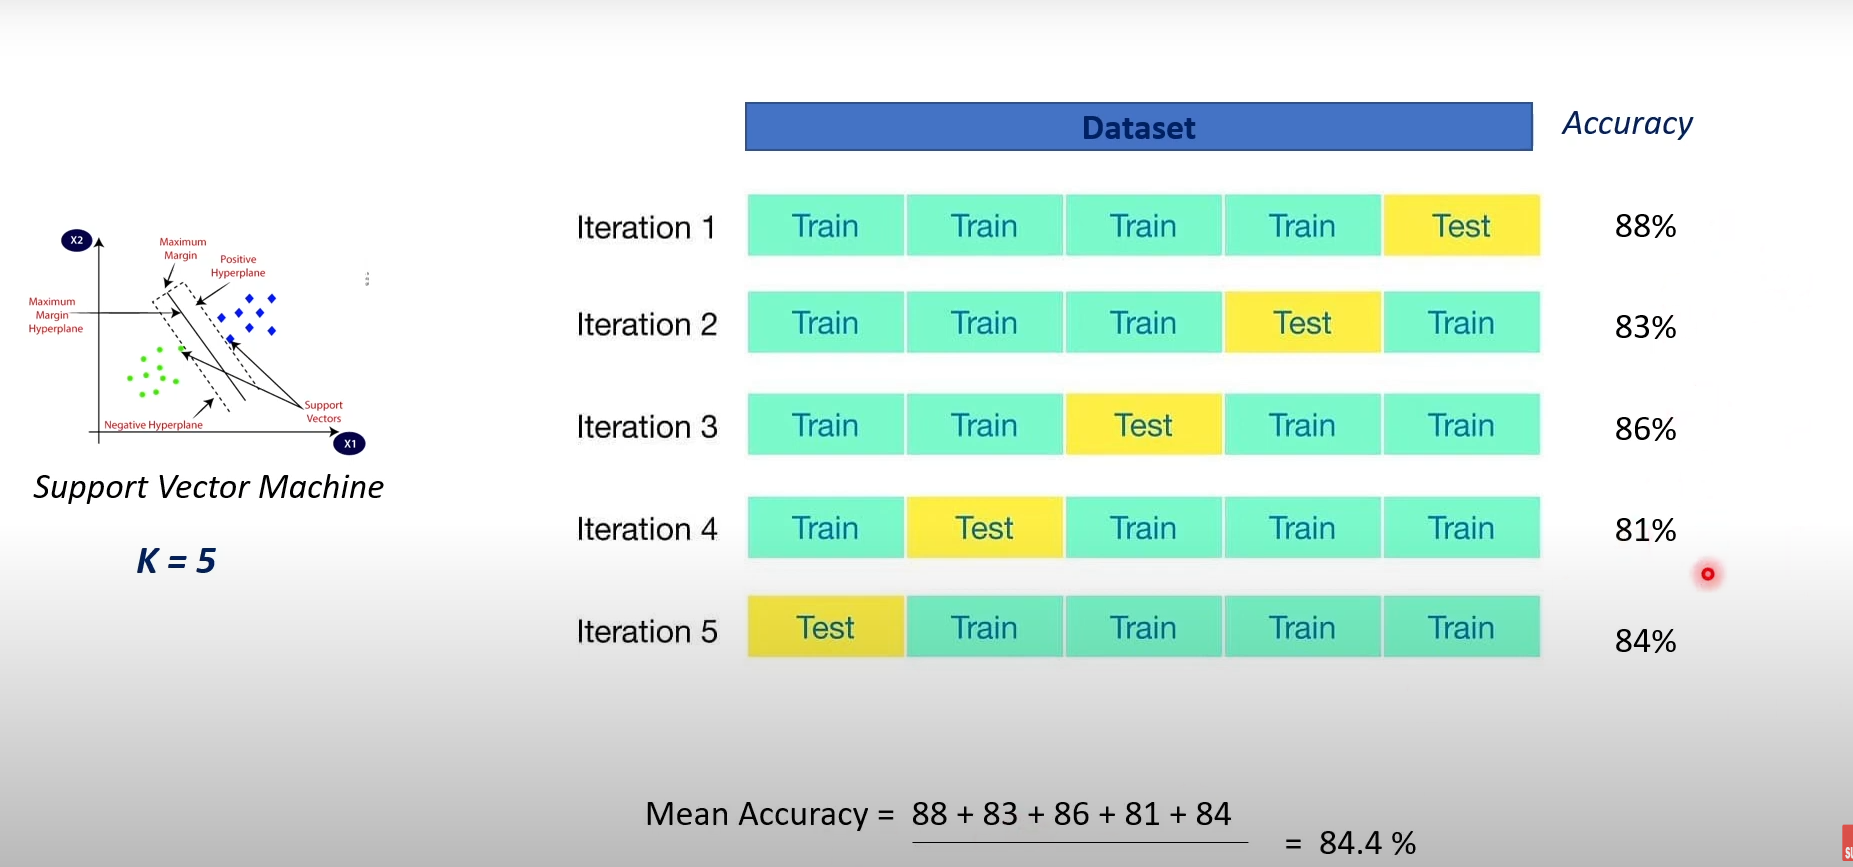

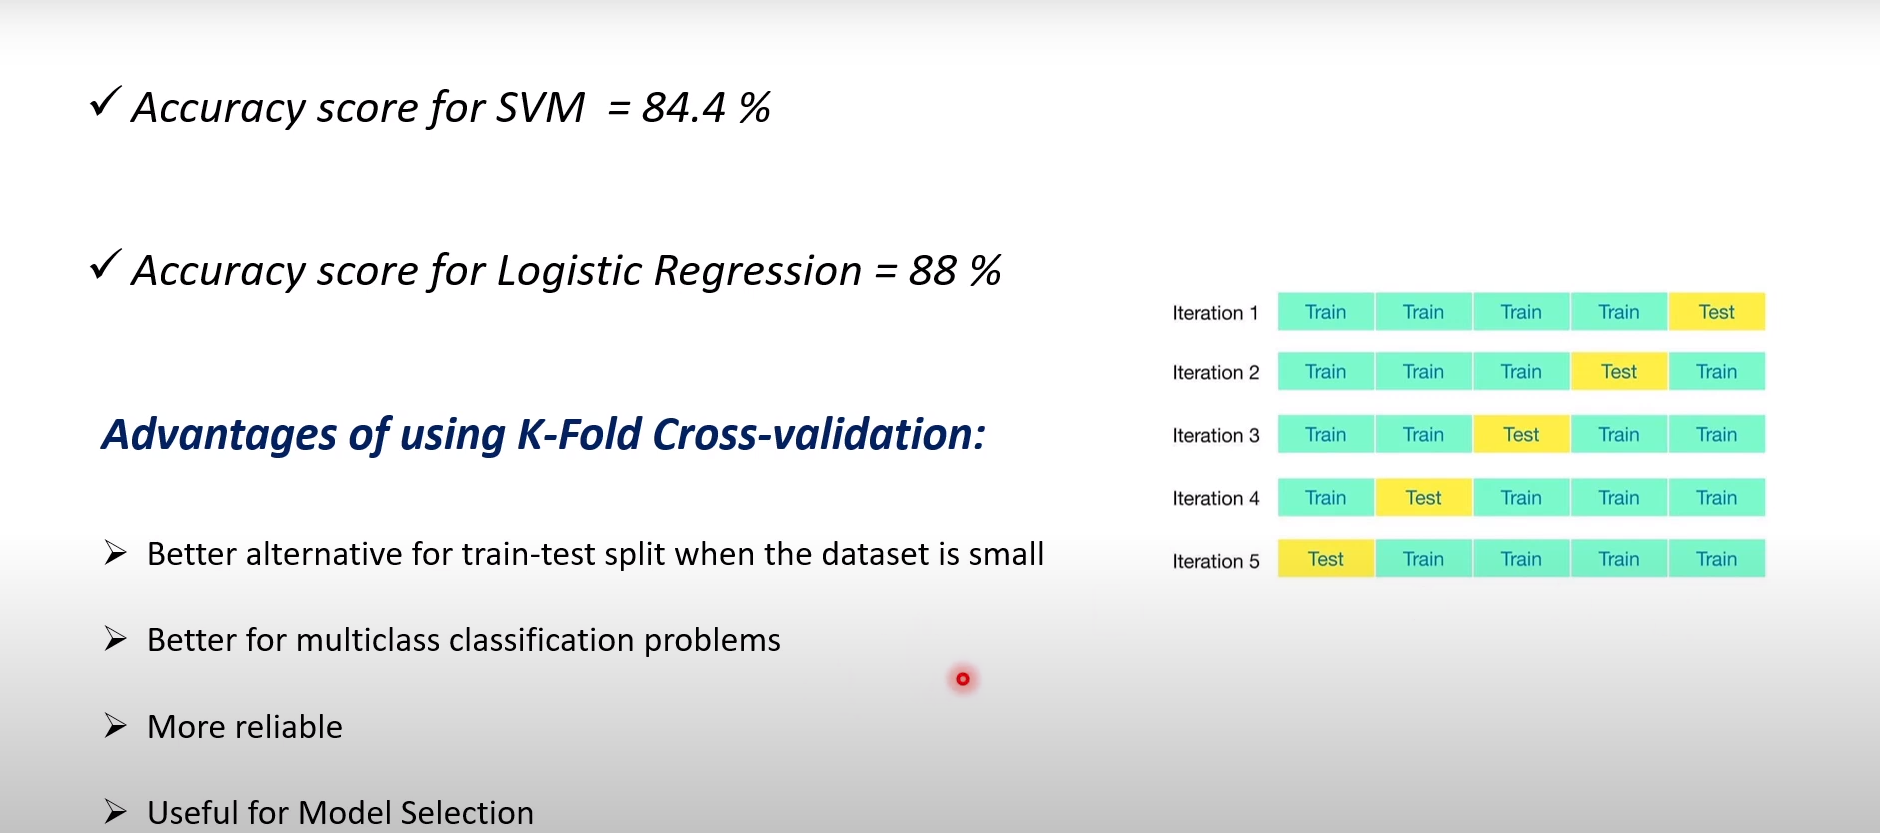

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
df = pd.read_csv('/content/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
df.shape

(303, 14)

In [85]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [86]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 -> Defective heart<br>0-> Healthy heart

In [87]:
#splitting the features and target
X = df.drop(columns='target',axis=1)
Y = df['target']

In [88]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [89]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [90]:
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify=Y,random_state = 3)

In [91]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(242, 13) (61, 13) (242,) (61,)


Comparing the performance of models

In [92]:
#list of models
models = [LogisticRegression(max_iter = 1000),SVC(kernel = 'linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [93]:
def compare_models_train_test():
  for model in models:
    model.fit(X_train,Y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test,test_data_prediction)
    print('Accuracy score of the ', model,'= ',accuracy)

In [94]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000) =  0.7704918032786885
Accuracy score of the  SVC(kernel='linear') =  0.7704918032786885
Accuracy score of the  KNeighborsClassifier() =  0.6557377049180327
Accuracy score of the  RandomForestClassifier() =  0.7868852459016393


#Cross Validation

In [95]:
#logisticRegression model
cv_score_lr = cross_val_score(LogisticRegression(max_iter = 1000),X,Y,cv = 5)

In [96]:
# print(cv_score_lr)
mean_acc_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_acc_lr =  mean_acc_lr *100
mean_accuracy_lr = round(mean_acc_lr,2)
print('Man accuracy score for Logistic Regression model is ',mean_accuracy_lr,' %')

Man accuracy score for Logistic Regression model is  82.83  %


Create a function to check mean acc of all models

In [97]:
def compare_model_cross_validation():
  for model in models:
    cv_score = cross_val_score(model,X,Y,cv=5)
    mean_accuracy_ = sum(cv_score)/len(cv_score)
    mean_accuracy_ =  mean_accuracy_ *100
    mean_accuracy_ = round(mean_accuracy_,2)
    print('______________________________________________________________________________________________________________________________')
    print('Cross Validation accuracies for ',model,'= ',cv_score)
    print('Mean accuracy score for ', model,' is ',mean_accuracy_,' %')
    print('-----------------------------------------------------------------------------------------------------------------------------')

In [98]:
compare_model_cross_validation()

______________________________________________________________________________________________________________________________
Cross Validation accuracies for  LogisticRegression(max_iter=1000) =  [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean accuracy score for  LogisticRegression(max_iter=1000)  is  82.83  %
-----------------------------------------------------------------------------------------------------------------------------
______________________________________________________________________________________________________________________________
Cross Validation accuracies for  SVC(kernel='linear') =  [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean accuracy score for  SVC(kernel='linear')  is  82.83  %
-----------------------------------------------------------------------------------------------------------------------------
________________________________________________________________________________________________________________________

#HYPERPARAMETER TUNUNG

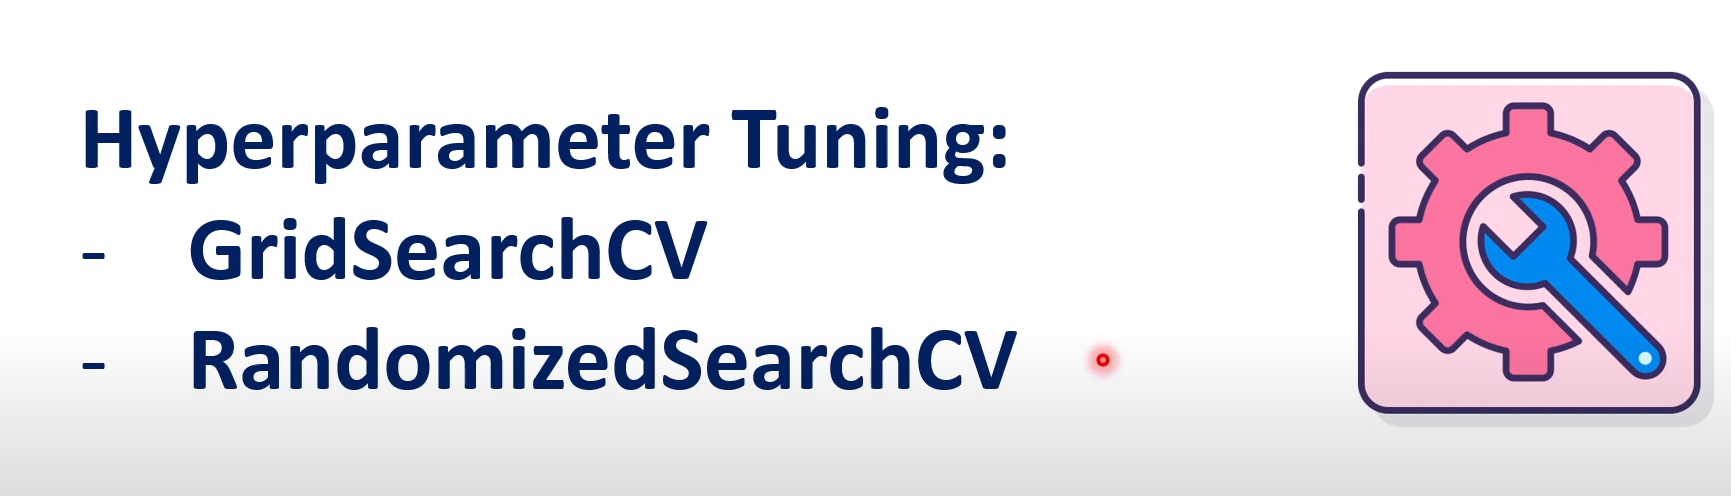

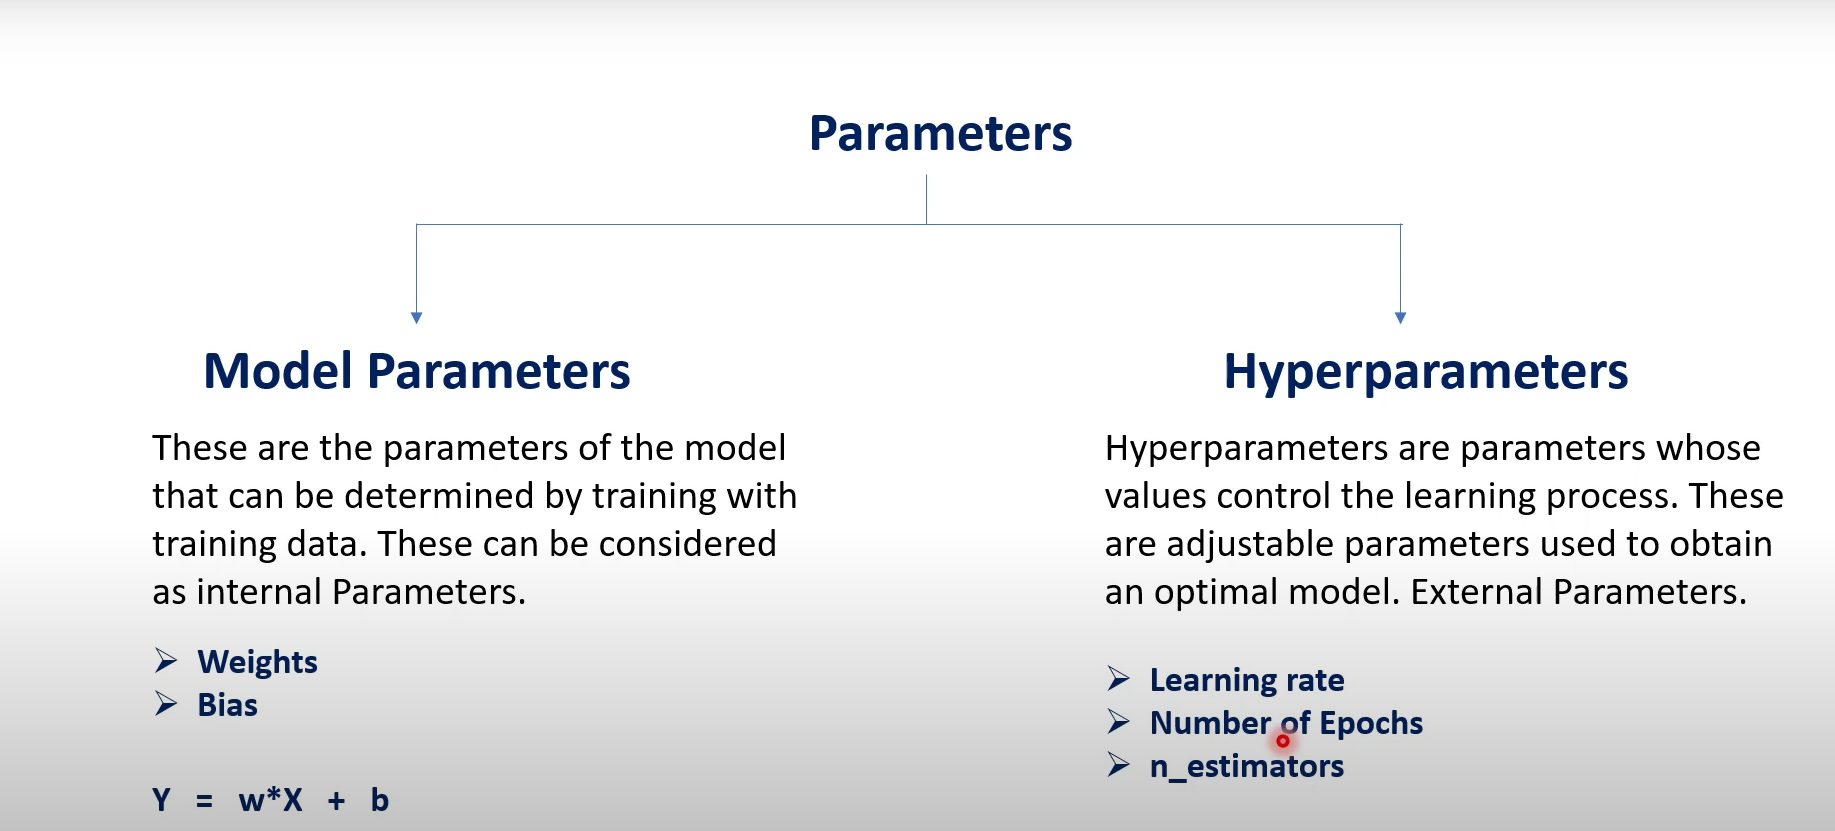

#hyperparameter tuning

1. GridSearchCV<br>
2. RandomizedSearchCV

In [99]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [100]:
df1 = sklearn.datasets.load_breast_cancer()

In [101]:
print(df1)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [104]:
 #loading the data to a data frame
df = pd.DataFrame(df1.data,columns = df1.feature_names)

In [105]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [107]:
df['label']  = df1.target

In [108]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [109]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [110]:
# 1->Benign
# 0->Malignant

Separating the features and target

In [111]:
X = df.drop(columns = 'label',axis=1)
Y = df['label']

In [112]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [113]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [114]:
X = np.asarray(X)

In [115]:
Y = np.asarray(Y)

#GridSearchCV

GridSearchCV is used for determining the best parameters for our model

In [123]:
#loading the SVC mmodel
model =SVC()

In [130]:
#hyperparameters 
parameters = {
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'C' : [1,5,10,20]
}

In [131]:
#grid search
classifier = GridSearchCV(model,parameters,cv=5)

In [132]:
#fitting the data to out model
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [133]:
classifier.cv_results_

{'mean_fit_time': array([1.24814277e+00, 3.20477486e-03, 3.68652344e-03, 1.13477707e-02,
        2.49783692e+00, 2.98490524e-03, 3.14455032e-03, 1.12320900e-02,
        3.77827997e+00, 3.22723389e-03, 3.08060646e-03, 1.04163647e-02,
        5.91643109e+00, 3.30257416e-03, 3.09338570e-03, 1.03588581e-02]),
 'std_fit_time': array([4.30012943e-01, 5.38056136e-04, 1.02347917e-04, 2.97565605e-04,
        4.53467316e-01, 2.61750706e-04, 1.22311882e-04, 2.03686833e-03,
        7.07037210e-01, 1.46259179e-04, 7.72652782e-05, 5.64774727e-04,
        1.98105905e+00, 1.72779627e-04, 1.66738957e-04, 5.19529772e-04]),
 'mean_score_time': array([0.00097351, 0.00108547, 0.00161848, 0.00313787, 0.00102973,
        0.00095897, 0.00124393, 0.00260029, 0.00101624, 0.00093932,
        0.00122705, 0.00273232, 0.00098596, 0.00079851, 0.0011601 ,
        0.00265355]),
 'std_score_time': array([2.86099911e-05, 6.54896215e-05, 4.03798589e-05, 9.10379920e-05,
        1.34442797e-04, 8.71790045e-05, 6.16841163e-

In [137]:
#best parameters for SVC
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [139]:
#determining the highest acc
highest_acc = classifier.best_score_
print(highest_acc)

0.9525694767893185


In [142]:
#loading the results in to a pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
(result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.248143,0.430013,0.000974,0.000029,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003205,0.000538,0.001085,0.000065,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.003687,0.000102,0.001618,0.000040,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.011348,0.000298,0.003138,0.000091,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.497837,0.453467,0.001030,0.000134,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [144]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [146]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


Highest accuracy = 95.2%<br>The best parameters =<br> {<br>'C:10,<br>
'kernel':linear'<br>}

#RandomizedSearchCV

In [153]:
#loading the SVC mmodel
model =SVC()

#hyperparameters 
parameters = {
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'C' : [1,5,10,20]
}

#randomized search cv
classifier = RandomizedSearchCV(model,parameters,cv=5)

#fitting the data to out model
classifier.fit(X,Y)

classifier.cv_results_

{'mean_fit_time': array([1.14614964e-02, 1.34212470e+00, 2.49906235e+00, 5.94024029e+00,
        1.32657051e-02, 2.76842117e-03, 1.02376461e-02, 3.09214592e-03,
        3.14831734e-03, 3.76757689e+00]),
 'std_fit_time': array([9.79518944e-04, 5.13118059e-01, 3.30604301e-01, 1.98027564e+00,
        2.90894817e-03, 7.89289522e-05, 4.55595120e-04, 1.44105254e-04,
        4.70875185e-05, 6.71352065e-01]),
 'mean_score_time': array([0.00306191, 0.00115471, 0.00102658, 0.00104179, 0.00337958,
        0.00083871, 0.00252857, 0.00125589, 0.00117064, 0.00111604]),
 'std_score_time': array([3.08021362e-04, 1.85901949e-04, 1.09014131e-04, 1.58695934e-04,
        3.95930587e-04, 1.98620850e-05, 1.18302194e-04, 2.14982180e-05,
        4.89679491e-05, 2.05793493e-04]),
 'param_kernel': masked_array(data=['sigmoid', 'linear', 'linear', 'linear', 'sigmoid',
                    'poly', 'sigmoid', 'rbf', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
      

In [154]:
#best parameters for SVC
best_parameters = classifier.best_params_
print(best_parameters)

#determining the highest acc
highest_acc = classifier.best_score_
print(highest_acc)



{'kernel': 'linear', 'C': 10}
0.9525694767893185


In [155]:
#loading the results in to a pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
(result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011461,0.000980,0.003062,0.000308,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,9
1,1.342125,0.513118,0.001155,0.000186,linear,1,"{'kernel': 'linear', 'C': 1}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
2,2.499062,0.330604,0.001027,0.000109,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
3,5.940240,1.980276,0.001042,0.000159,linear,20,"{'kernel': 'linear', 'C': 20}",0.929825,0.956140,0.956140,0.938596,0.964602,0.949061,0.012816,3
4,0.013266,0.002909,0.003380,0.000396,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,8


In [156]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]
randomized_search_result

,param_C,param_kernel,mean_test_score
0,5,sigmoid,0.411178
1,1,linear,0.945536
2,5,linear,0.950815
3,20,linear,0.949061
4,1,sigmoid,0.460441
5,1,poly,0.908663
6,10,sigmoid,0.402391
7,5,rbf,0.931501
8,10,rbf,0.922714
9,10,linear,0.952569


Highest accuracy = 95.2%<br>The best parameters =<br> {<br>'C:10,<br>
'kernel':linear'<br>}